# Preprocess the tweets for sentiment analysis

In [1]:
#Import the libraries
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
#Download the twitter data set
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\thakk\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
#Select the positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
#Print the length of both class
print("Number of positive tweets: ", len(positive_tweets))
print("Number of negative tweets: ", len(negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


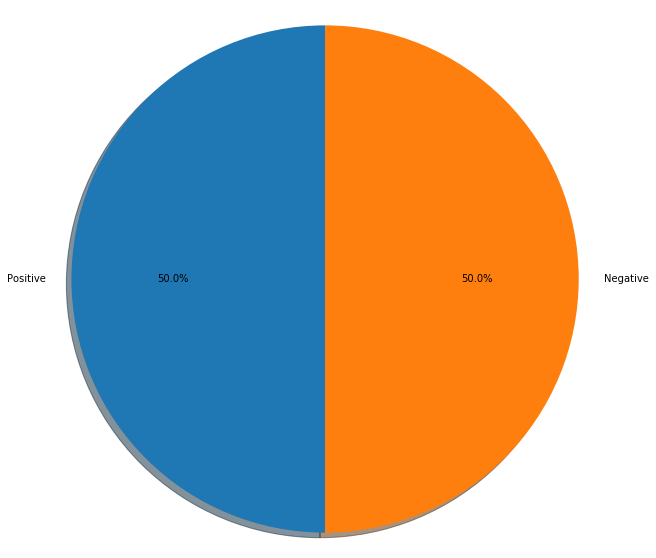

In [5]:
#Create a diagram to view pie chart of distribution
fig = plt.figure(figsize = (10, 10))
labels = 'Positive', 'Negative'
sizes = [len(positive_tweets), len(negative_tweets)]

#Plot the pie chart
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [6]:
#Print sample positive and negaative class in green and red color
print('\033[92m' + positive_tweets[random.randint(0,5000)])

print('\033[91m' + negative_tweets[random.randint(0,5000)])

@MartinaGamb see yaaaah! :D
the weather is set for more sleep but responsibilities. :-(


In [7]:
#Download the stopwords and other libraries
nltk.download('stopwords')
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thakk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Remove the hyperlinks, twitter marks and styles
tweet = positive_tweets[2277]
print(tweet)
#Remove word "RT"
tweet_ = re.sub(r'^RT[\s]+', '', tweet)

#Remove the hyperlinks
tweet_ = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet_)

#Remove the hashtags and hash sign
tweet_ = re.sub(r'#', '', tweet_)
print(tweet_)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [9]:
#Tokenize the string
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)

#Tokenize the tweet
tweet_tokens = tokenizer.tokenize(tweet_)
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [10]:
#Remove the stopwords and punctuations
stopwords_english = stopwords.words('english')
tweet_clean = []
for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweet_clean.append(word)
print(tweet_clean)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [11]:
#Stemming
stemmer = PorterStemmer()

tweet_stem = []
for word in tweet_clean:
    stem_word = stemmer.stem(word)
    tweet_stem.append(stem_word)
print(tweet_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [12]:
#Use the inbuilt function
from utils import process_tweet

tweet = positive_tweets[2277]
print(tweet)

tweet_preprocessed = process_tweet(tweet)
print(tweet_preprocessed)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
